# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Brillianta Zayyan Muhammad
- **Email:** brilliantazayyan@gmail.com
- **ID Dicoding:** brilliantazayyan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kategori produk apa yang paling banyak dan sedikit diminati oleh pelanggan?
- Pertanyaan 2 : Kategori produk apa yang memiliki rata-rata review tertinggi dan terendah?
- Pertanyaan 3 : Bagaimana trend pembelian oleh customer tiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [511]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [512]:
#1. Gathering Data
#Menggabungkan Beberapa Data Menjadi Satu DataFrame dengan menggunakan left join

order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
products_df = pd.read_csv("/content/products_dataset.csv")
order_df = pd.read_csv("/content/orders_dataset.csv")

product_orders_df = pd.merge(
    left=order_items_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)


product_detail_df = pd.merge(
    left=product_orders_df,
    right=products_df,
    how="left",
    on="product_id"
)

all_df = pd.merge(
    left=product_detail_df,
    right=order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,...,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,...,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,...,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,...,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,...,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


### Assessing Data

In [513]:
#1. Menilai data
all_df.info()
#Berdasarkan hasil penilaian data, terdapat missing value pada kolom no 7 hingga 20

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   review_id                      112372 non-null  object 
 8   review_score                   112372 non-null  float64
 9   review_comment_title           13434 non-null   object 
 10  review_comment_message         47642 non-null   object 
 11  review_creation_date           112372 non-null  object 
 12  review_answer_timestamp       

In [514]:
#2. Checking Missing Values
all_df.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
review_id                          942
review_score                       942
review_comment_title             99880
review_comment_message           65672
review_creation_date               942
review_answer_timestamp            942
product_category_name             1612
product_name_lenght               1612
product_description_lenght        1612
product_photos_qty                1612
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_d

In [515]:
#3. Checking Duplicate Data
all_df.duplicated().sum()
#Tidak ada data yang terdapat duplikasi

0

In [516]:
#4. Checking Innacurate Values
all_df.describe(include="all")

#Dalam analisis saya, data yang digunakan tidak memiliki innacurate values

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,113314,113314.000000,113314,113314,113314,113314.000000,113314.000000,112372,112372.000000,13434,...,113296.000000,113296.000000,113296.000000,113314,113314,113314,113299,112111,110839,113314
unique,98666,NaN,32951,3095,93318,NaN,NaN,97709,NaN,4497,...,NaN,NaN,NaN,98666,7,98112,90174,81017,95664,450
top,5a3b1c29a49756e75f1ef513383c0c12,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,NaN,Recomendo,...,NaN,NaN,NaN,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00
freq,22,NaN,527,2039,22,NaN,NaN,21,NaN,471,...,NaN,NaN,NaN,22,110840,22,23,48,22,611
mean,NaN,1.198528,NaN,NaN,NaN,120.478701,19.979428,NaN,4.032473,NaN,...,30.162495,16.584513,23.003539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.707016,NaN,NaN,NaN,183.279678,15.783227,NaN,1.387849,NaN,...,16.151737,13.439206,11.708481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,1.000000,NaN,...,7.000000,2.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,4.000000,NaN,...,18.000000,8.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.260000,NaN,5.000000,NaN,...,25.000000,13.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,5.000000,NaN,...,38.000000,20.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data

In [517]:
#1. Menganalisa Missing Values (review_score dan product_category_name) ->
all_df[all_df.review_score.isna()]
#Berdasarkan analisis saya, masih terdapat data yang mengandung informasi yang penting, sehingga saya tidak menggunakan metode drop, namun menggunakan metode fillna()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,NaN,NaN,NaN,...,17.0,11.0,14.0,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,NaN,NaN,NaN,...,17.0,11.0,14.0,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,NaN,NaN,NaN,...,17.0,11.0,14.0,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00
89,00335b686d693c7d72deeb12f8e89227,1,87b08e712cc4c9fe70984c5a24b29e2f,f00e21b1e91a79653163b7fd8f293ff1,2017-07-28 03:45:26,63.90,16.89,NaN,NaN,NaN,...,25.0,16.0,16.0,d96e5c4400413a11fa8c9fd54be4a20b,delivered,2017-07-17 21:25:23,2017-07-19 03:45:26,2017-07-19 17:07:11,2017-09-12 20:58:45,2017-08-11 00:00:00
257,00a77f9cc25b05b2004752593d7b8888,1,33bd5538a16d23f0a39da1c9bfd20980,94e93ce877be27a515118dbfd2c2be41,2017-06-28 20:05:22,177.90,18.50,NaN,NaN,NaN,...,54.0,9.0,28.0,acb6cc6ec99086b8b53c858a0731c189,delivered,2017-06-22 19:53:24,2017-06-22 20:05:22,2017-06-23 12:33:16,2017-07-07 21:45:44,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112878,feef9f21cf88daf192de972212d1c5d5,1,404a57563d487aecbc2b1a01d9b89aab,4a3ca9315b744ce9f8e9374361493884,2017-04-26 04:03:07,220.00,26.03,NaN,NaN,NaN,...,45.0,15.0,35.0,31a965e3f0fe26e844fe5dbcfac619e3,delivered,2017-04-13 18:47:07,2017-04-18 04:03:07,2017-04-20 15:47:25,2017-05-11 11:39:00,2017-05-22 00:00:00
112894,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,NaN,NaN,NaN,...,54.0,18.0,47.0,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00
112950,ff18b518679a92dcb00e16fae93c6d59,1,461f43be3bdf8844e65b62d9ac2c7a5a,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-07 16:31:14,146.00,26.30,NaN,NaN,NaN,...,20.0,14.0,16.0,74bff367924485ad26b79d31e5623874,delivered,2017-10-29 16:15:04,2017-10-29 16:31:44,2017-11-03 18:36:52,2017-11-28 18:55:15,2017-12-01 00:00:00
113057,ff5b7f440481674b38554434638beebf,1,f0354861ab19941a53209c2acbb1b604,5a425cc503b39b262a847fd6212bf53b,2018-08-21 03:29:42,94.90,15.73,NaN,NaN,NaN,...,33.0,27.0,22.0,e6ab213cb124524887ac41b8eaca9653,delivered,2018-08-15 20:24:56,2018-08-17 03:29:42,2018-08-17 11:56:00,2018-08-30 14:18:52,2018-08-23 00:00:00


In [518]:
all_df[all_df.product_category_name.isna()]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
124,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,219cb56781473bd4ee7023459372d25c,5.0,NaN,...,16.0,5.0,12.0,ae55e228ded796581eccc67045516023,delivered,2017-09-26 15:24:03,2017-09-26 15:49:17,2017-09-28 18:42:42,2017-09-29 18:29:50,2017-10-11 00:00:00
126,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,c13699f8e389acea5f406e527f0edfb3,5.0,NaN,...,35.0,14.0,11.0,baa4ed05f22ffb6c4a41b71b699a492c,delivered,2017-02-13 16:18:07,2017-02-14 03:42:56,2017-02-14 08:32:53,2017-02-15 11:35:56,2017-03-10 00:00:00
133,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,23e790c68acbe511dd7b94c6707f2e41,3.0,NaN,...,20.0,12.0,15.0,a69c820c317aa348d781a9d6732afc23,delivered,2018-02-27 12:16:30,2018-02-28 09:29:25,2018-02-28 20:48:42,2018-03-23 00:52:43,2018-03-21 00:00:00
143,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,a96a757f169ded9f72fc4f3c03750d60,4.0,NaN,...,16.0,2.0,11.0,c664dc5de5b5f4184bc4ca0285b9f8fe,delivered,2018-01-18 17:05:30,2018-01-20 09:07:51,2018-01-23 14:33:54,2018-02-06 20:07:20,2018-02-20 00:00:00
172,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,304aaea0a61ca9e8c661cc7a403be82f,5.0,NaN,...,16.0,2.0,11.0,97dc92f1aae3a7db8b252d1b8466910e,delivered,2018-02-17 14:22:34,2018-02-17 14:35:28,2018-02-20 19:08:00,2018-02-25 13:46:52,2018-03-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112967,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61,23ba2005bbf1678539576d1a6844c778,4.0,NaN,...,20.0,12.0,15.0,442c6e15fe1e8e63a96598607c92bc35,delivered,2018-01-26 14:41:14,2018-01-27 02:40:12,2018-01-29 22:29:45,2018-02-07 14:57:00,2018-02-22 00:00:00
112994,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-11-21 03:55:39,39.90,9.94,af9cdab9e0793a928a071030381a0ae0,3.0,NaN,...,32.0,15.0,15.0,945c975073e57fe39a636afbf6689bcc,delivered,2017-11-11 15:18:16,2017-11-14 03:55:39,2017-11-22 12:46:32,2017-11-28 18:00:22,2017-11-27 00:00:00
113011,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,2017-05-10 10:15:19,139.00,21.42,08583ca89a82fe5d444ba1ea74207d09,5.0,NaN,...,16.0,6.0,11.0,bb308532dc44f5973cd2caf17d15bd8c,delivered,2017-05-03 07:08:50,2017-05-04 10:15:19,2017-05-05 10:34:52,2017-05-15 10:13:46,2017-06-05 00:00:00
113100,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,2018-02-22 15:35:35,49.90,15.11,aaf47a521878e6ebb65bbd4e5b711a99,5.0,NaN,...,21.0,15.0,21.0,eb09a9c966e7801d1ab6ccb15baa96ef,delivered,2018-02-17 14:46:29,2018-02-18 15:35:35,2018-02-19 17:15:12,2018-02-26 21:35:20,2018-03-13 00:00:00


In [519]:
#2. Mengatasi Missing Value
all_df.review_score.fillna(value="Did not fill in the review", inplace=True) #Saya asumsikan customer tidak melakukan review product
all_df.product_category_name.fillna(value="Unknown Category", inplace=True) #Saya asumsikan kategori produk tidak diketahui

In [520]:
all_df.review_score.value_counts()

5.0                           63525
4.0                           21315
1.0                           14235
3.0                            9423
2.0                            3874
Did not fill in the review      942
Name: review_score, dtype: int64

In [521]:
all_df.product_category_name.value_counts()

cama_mesa_banho                  11270
beleza_saude                      9727
esporte_lazer                     8700
moveis_decoracao                  8415
informatica_acessorios            7894
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 74, dtype: int64

In [522]:
all_df.review_score.value_counts().isna().sum()
#Data telah dibersihkan , dan tidak memiliki missing values

0

In [523]:
all_df.product_category_name.value_counts().isna().sum()
#Data telah dibersihkan , dan tidak memiliki missing values

0

In [524]:
#Dalam step cleaning data, disini saya berfokus pada kolom review_score dan product_category_name.
#Hal ini dikarenakan  2 kolom tersebut memiiki peran penting dalam exploratory data nantinya.
#Sedangkan kolom penting lainnya seperti order_id, order_item_id, product_id sudah bersih sehingga tidak perlu dilakukan cleaning data lagi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [525]:
#Karena pertanyaan sudah definisikan, maka langkah yang selanjutnya saya lakukan adalah mengeksplor data untuk menjawab pertanyaan.

Mengeksplor parameter stastistik


In [526]:
all_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,113314,113314.000000,113314,113314,113314,113314.000000,113314.000000,112372,113314.0,13434,...,113296.000000,113296.000000,113296.000000,113314,113314,113314,113299,112111,110839,113314
unique,98666,NaN,32951,3095,93318,NaN,NaN,97709,6.0,4497,...,NaN,NaN,NaN,98666,7,98112,90174,81017,95664,450
top,5a3b1c29a49756e75f1ef513383c0c12,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,5.0,Recomendo,...,NaN,NaN,NaN,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00
freq,22,NaN,527,2039,22,NaN,NaN,21,63525.0,471,...,NaN,NaN,NaN,22,110840,22,23,48,22,611
mean,NaN,1.198528,NaN,NaN,NaN,120.478701,19.979428,NaN,NaN,NaN,...,30.162495,16.584513,23.003539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.707016,NaN,NaN,NaN,183.279678,15.783227,NaN,NaN,NaN,...,16.151737,13.439206,11.708481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,...,7.000000,2.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,...,18.000000,8.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.260000,NaN,NaN,NaN,...,25.000000,13.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,NaN,NaN,...,38.000000,20.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>],
       [<Axes: title={'center': 'product_name_lenght'}>,
        <Axes: title={'center': 'product_description_lenght'}>,
        <Axes: title={'center': 'product_photos_qty'}>],
       [<Axes: title={'center': 'product_weight_g'}>,
        <Axes: title={'center': 'product_length_cm'}>,
        <Axes: title={'center': 'product_height_cm'}>],
       [<Axes: title={'center': 'product_width_cm'}>, <Axes: >, <Axes: >]],
      dtype=object)

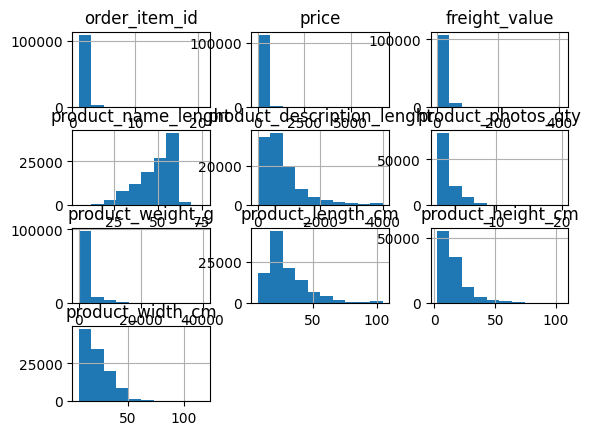

In [527]:
all_df.hist()

In [528]:
all_df.corr()

<ipython-input-528-635530388cd0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_df.corr()


,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060537,-0.029525,-0.023827,-0.014697,-0.056153,-0.003317,0.006334,0.029641,-0.009967
price,-0.060537,1.000000,0.414349,0.016976,0.198165,0.051954,0.339171,0.145839,0.223600,0.172491
freight_value,-0.029525,0.414349,1.000000,0.023490,0.094049,0.022647,0.610188,0.308806,0.391862,0.323410
product_name_lenght,-0.023827,0.016976,0.023490,1.000000,0.091390,0.145633,0.022466,0.060771,-0.028889,0.064594
product_description_lenght,-0.014697,0.198165,0.094049,0.091390,1.000000,0.118948,0.059687,0.005377,0.073245,-0.068936
product_photos_qty,-0.056153,0.051954,0.022647,0.145633,0.118948,1.000000,0.022608,0.046908,-0.033273,0.009806
product_weight_g,-0.003317,0.339171,0.610188,0.022466,0.059687,0.022608,1.000000,0.460523,0.583116,0.505934
product_length_cm,0.006334,0.145839,0.308806,0.060771,0.005377,0.046908,0.460523,1.000000,0.192368,0.533054
product_height_cm,0.029641,0.223600,0.391862,-0.028889,0.073245,-0.033273,0.583116,0.192368,1.000000,0.280145
product_width_cm,-0.009967,0.172491,0.323410,0.064594,-0.068936,0.009806,0.505934,0.533054,0.280145,1.000000


In [529]:
#1. Nama kategori paling banyak hingga paling sedikit yang diorder oleh customer
all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False)


product_category_name
cama_mesa_banho                  9417
beleza_saude                     8836
esporte_lazer                    7720
informatica_acessorios           6689
moveis_decoracao                 6449
                                 ... 
la_cuisine                         13
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       8
seguros_e_servicos                  2
Name: order_id, Length: 74, dtype: int64

In [530]:
#2. Nama kategori paling banyak yang diorder oleh customer
all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(5)

product_category_name
cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
Name: order_id, dtype: int64

In [531]:
#3. Nama kategori paling sedikit yang diorder oleh customer
all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=True).head(5)

product_category_name
seguros_e_servicos                2
pc_gamer                          8
fashion_roupa_infanto_juvenil     8
cds_dvds_musicais                12
la_cuisine                       13
Name: order_id, dtype: int64

In [532]:
#4. Rata-rata skor review dari beberapa product_category_name
all_df['review_score'] = pd.to_numeric(all_df['review_score'], errors='coerce')
average_review_score = all_df.groupby(by='product_category_name').agg({
    'review_score': ["max", "min", "mean", "std"]
})

average_review_score.head()

review_score                         
                                   max  min      mean       std
product_category_name                                          
Unknown Category                   5.0  1.0  3.841051  1.535558
agro_industria_e_comercio          5.0  1.0  4.000000  1.363019
alimentos                          5.0  1.0  4.218182  1.293425
alimentos_bebidas                  5.0  1.0  4.315412  1.125639
artes                              5.0  1.0  3.937198  1.455127

Melakukan Teknik Analisis Lanjutan menggunakan RFM Analisis

In [533]:
# Ubah kolom tanggal ke tipe data datetime
all_df['review_creation_date'] = pd.to_datetime(all_df['review_creation_date'])

# Hitung Recency, Frequency, dan Monetary
snapshot_date = all_df['review_creation_date'].max() + pd.DateOffset(days=1) # ambil tanggal review terakhir + 1 hari sebagai titik acuan
rfm_df = all_df.groupby(['product_category_name']).agg({
    'review_creation_date': lambda x: (snapshot_date - x.max()).days, # Recency
    'review_id': 'count', # Frequency
    'review_score': 'mean' # Monetary
})

# Ubah nama kolom
rfm_df.rename(columns = {'review_creation_date': 'Recency',
                         'review_id': 'Frequency',
                         'review_score': 'MonetaryValue'}, inplace=True)

print(rfm_df.head())


                           Recency  Frequency  MonetaryValue
product_category_name                                       
Unknown Category                 1       1598       3.841051
agro_industria_e_comercio        1        212       4.000000
alimentos                        1        495       4.218182
alimentos_bebidas                1        279       4.315412
artes                            2        207       3.937198


In [534]:
#5. Kategori produk dengan nilai rata-rata review tertinggi
sorted_highAverage_review_score = average_review_score.sort_values(by=('review_score', 'mean'), ascending=False)

sorted_highAverage_review_score.head()

review_score                         
                                            max  min      mean       std
product_category_name                                                   
cds_dvds_musicais                           5.0  3.0  4.642857  0.633324
fashion_roupa_infanto_juvenil               5.0  1.0  4.500000  1.414214
livros_interesse_geral                      5.0  1.0  4.446266  1.123460
construcao_ferramentas_ferramentas          5.0  1.0  4.444444  1.117780
flores                                      5.0  1.0  4.419355  1.088552

In [535]:
#6. Kategori produk dengan nilai rata-rata review terendah
sorted_lowAverage_review_score = average_review_score.sort_values(by=('review_score', 'mean'), ascending=True)

sorted_lowAverage_review_score.head()

review_score                 \
                                                       max  min      mean   
product_category_name                                                       
seguros_e_servicos                                     4.0  1.0  2.500000   
fraldas_higiene                                        5.0  1.0  3.256410   
portateis_cozinha_e_preparadores_de_alimentos          5.0  1.0  3.266667   
pc_gamer                                               5.0  1.0  3.333333   
moveis_escritorio                                      5.0  1.0  3.493183   

                                                         
                                                    std  
product_category_name                                    
seguros_e_servicos                             2.121320  
fraldas_higiene                                1.551196  
portateis_cozinha_e_preparadores_de_alimentos  1.579632  
pc_gamer                                       1.802776  
moveis_escritorio                              1.532888

## Visualization & Explanatory Analysis

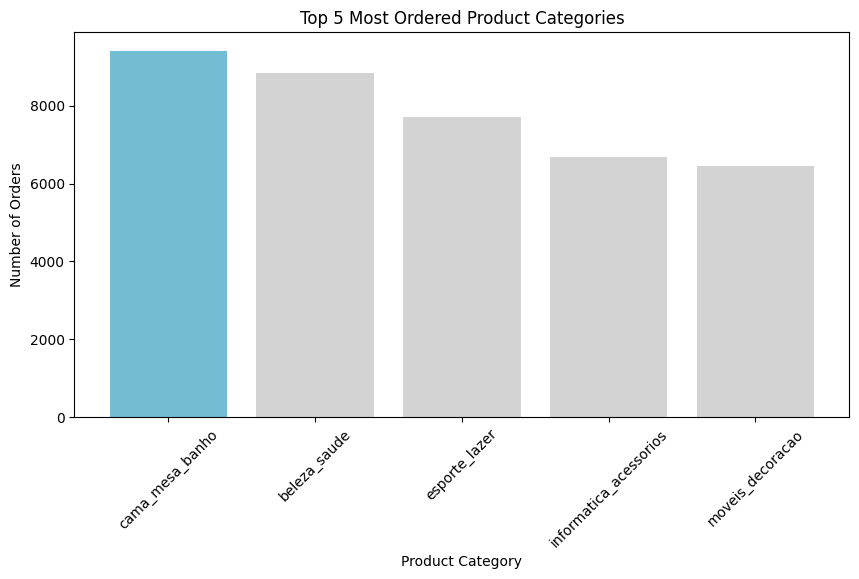

In [536]:
import matplotlib.pyplot as plt
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
# Mengelompokkan data dan mengambil 5 kategori teratas
top_5_ordered_categories = all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(5)

# Membuat bar chart
plt.figure(figsize=(10, 5))  # Menentukan ukuran figure
plt.bar(top_5_ordered_categories.index, top_5_ordered_categories.values, color=colors)  # Membuat bar chart vertikal
plt.ylabel('Number of Orders')  # Menambahkan label pada sumbu y
plt.xlabel('Product Category')  # Menambahkan label pada sumbu x
plt.title('Top 5 Most Ordered Product Categories')  # Menambahkan judul
plt.xticks(rotation=45)  # Memutar label sumbu x agar mudah dibaca
plt.show()  # Menampilkan plot


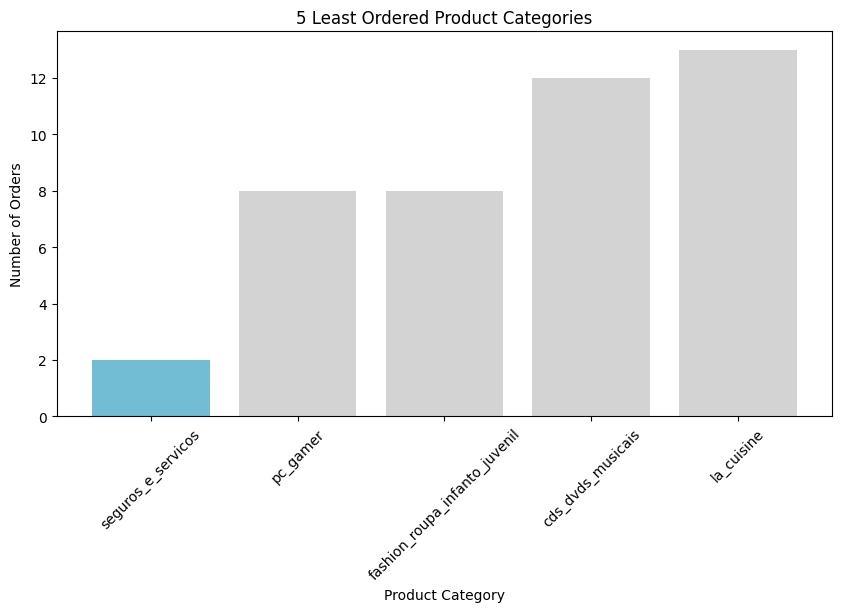

In [537]:
import matplotlib.pyplot as plt
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
# Mengelompokkan data dan mengambil 5 kategori teratas
least_5_ordered_categories = all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=True).head(5)

# Membuat bar chart
plt.figure(figsize=(10, 5))  # Menentukan ukuran figure
plt.bar(least_5_ordered_categories.index, least_5_ordered_categories.values, color=colors)  # Membuat bar chart vertikal
plt.ylabel('Number of Orders')  # Menambahkan label pada sumbu y
plt.xlabel('Product Category')  # Menambahkan label pada sumbu x
plt.title('5 Least Ordered Product Categories')  # Menambahkan judul
plt.xticks(rotation=45)  # Memutar label sumbu x agar mudah dibaca
plt.show()  # Menampilkan plot


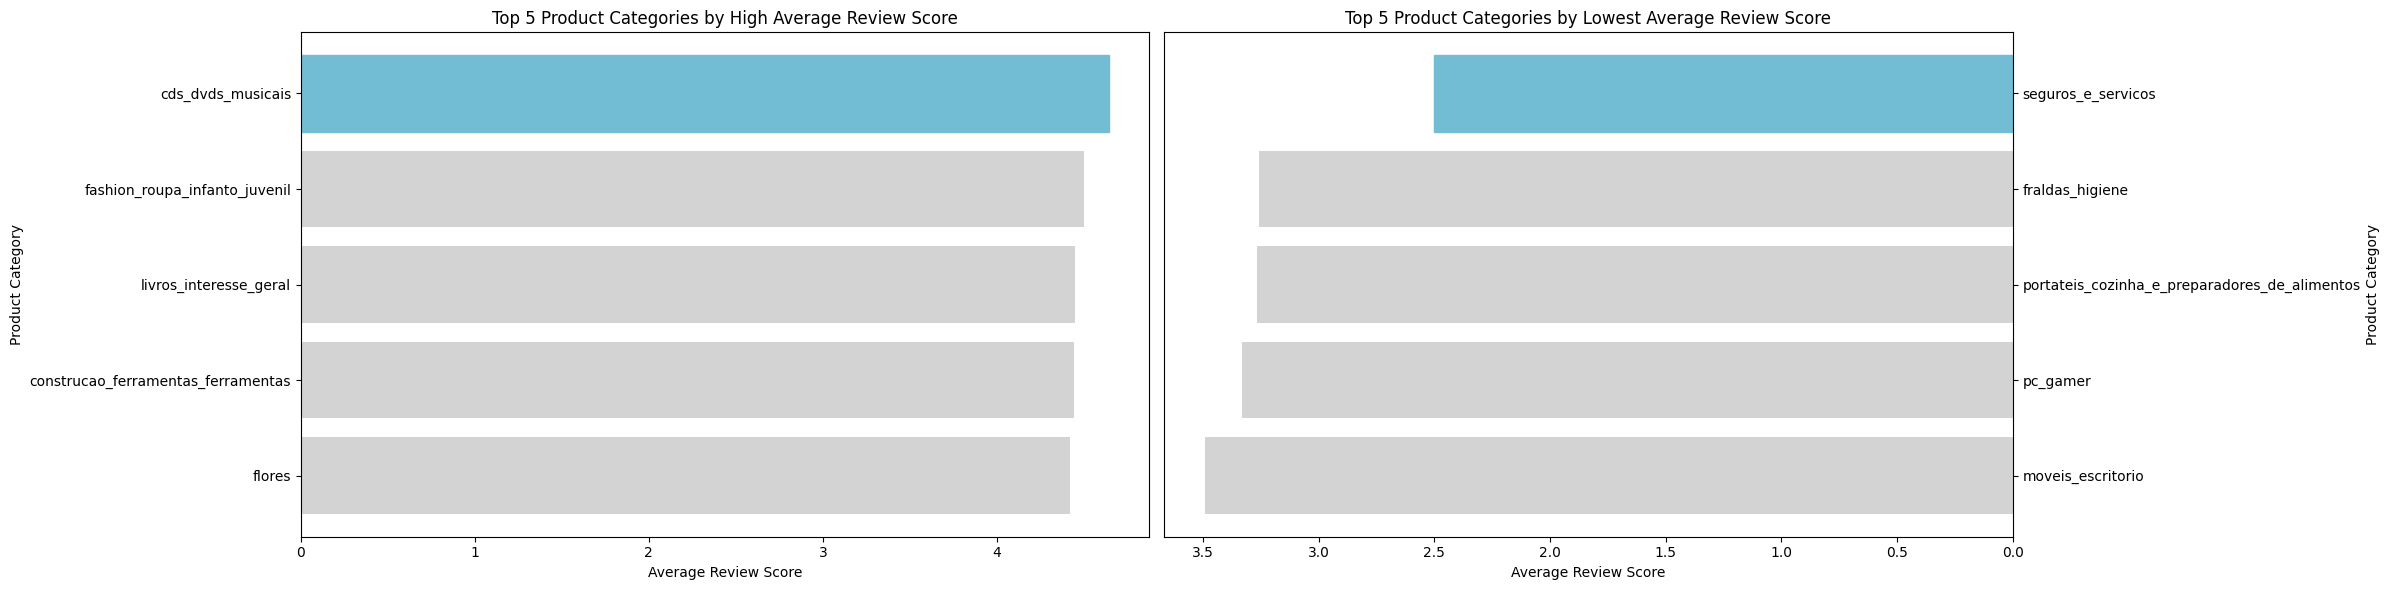

In [538]:
#Chart kategori produk yang memiliki nilai rata-rata tertinggi dan terendah

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6)) # Membuat figure dengan 2 subplots
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Mengurutkan dan memilih 5 kategori produk dengan rata-rata review tertinggi
top_5_categories = sorted_highAverage_review_score.sort_values(by=('review_score', 'mean'), ascending=False).head(5)

# Membuat bar chart
bars = ax[0].barh(top_5_categories.index, top_5_categories[('review_score', 'mean')], color=colors)  # data untuk bar chart
bars[0].set_color('#72BCD4')  # highlight bar dengan nilai tertinggi
ax[0].set_xlabel('Average Review Score')  # label sumbu x
ax[0].set_ylabel('Product Category')  # label sumbu y
ax[0].set_title('Top 5 Product Categories by High Average Review Score')  # judul
ax[0].invert_yaxis()

# Chart 2: Kategori produk dengan rata-rata review terendah
bottom_5_categories = sorted_lowAverage_review_score.sort_values(by=('review_score', 'mean'), ascending=True).head(5)

bars = ax[1].barh(bottom_5_categories.index, bottom_5_categories[('review_score', 'mean')], color=colors)  # data untuk bar chart
bars[0].set_color('#72BCD4')  # highlight bar dengan nilai terendah
ax[1].invert_xaxis()
ax[1].invert_yaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_xlabel('Average Review Score')  # label sumbu x
ax[1].set_ylabel('Product Category')  # label sumbu y
ax[1].set_title('Top 5 Product Categories by Lowest Average Review Score')  # judul

plt.tight_layout()  # Menyesuaikan jarak antara subplots
plt.show()


### Pertanyaan 1: Kategori produk apa yang paling banyak dan sedikit diminati oleh pelanggan?

### Pertanyaan 2 : Kategori produk apa yang memiliki rata-rata review tertinggi dan terendah?

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan hasil dari exploratory data yang telah dilakukan, saya menemukan suatu insight dari pertanyaan 1.
Kategori produk yang paling banyak diorder oleh customer yaitu kategori produk cama_mesa_banho dengan jumlah orderan mencapai 9417 order, sedangkan kategori produk yang paling sedikit diorder yaitu kategori produk seguros_e_servicos dengan jumlah order hanya mencapai 2 orderan.

- Conclution pertanyaan 2 :
Berdasarkan hasil dari exploratory data yang telah dilakukan, saya menemukan suatu insight dari pertanyaan 2.
Kategori produk yang memiliki rata-rata review skor tertinggi yaitu cds_dvds_musicais dengan rata-rata nilai 4.6, sedangkan kategori produk yang memiliki rata-rata review skor terendah yaitu seguros_e_servicos dengan nilai rata-rata 2.5.

In [539]:
#all_df.to_csv(r"main_data.csv", index=False)